In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\zomato.csv")
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [5]:
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

ValueError: could not convert string to float: 'NEW'

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

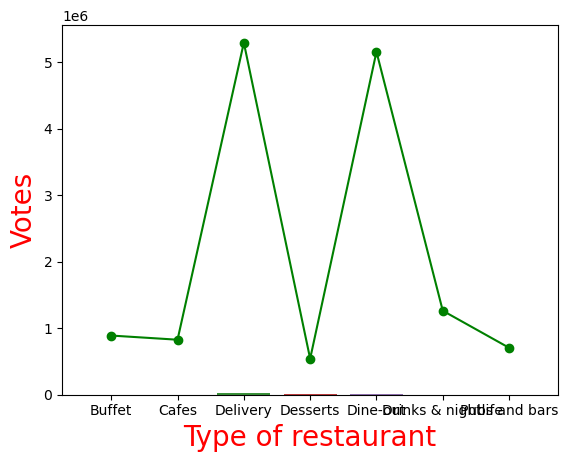

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
max_votes = dataframe['votes'].max()

In [8]:
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)
sns.countplot(x=data['online_order'])
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Restaurant(s) with the maximum votes:
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


NameError: name 'data' is not defined

TypeError: Neither the `x` nor `y` variable appears to be numeric.

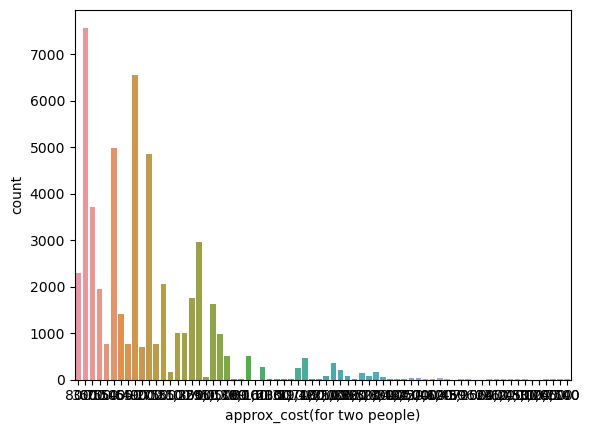

<Figure size 600x600 with 0 Axes>

In [9]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
